In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import gsw as sw
import scipy.stats as ss

from netCDF4 import Dataset

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

In [2]:
# calculate distance between points along each transect

def distance(data):
    transect = pd.unique(data['lon'])
    distances = pd.DataFrame()    
    for c in transect:
        temp = pd.DataFrame()
        temp = data.loc[(data['lon']==c), ['lat','lon', 'depth (m)']]
        
        # calculate distance in km between points
        temp['dx'] = np.insert(sw.distance(temp['lon'].values, temp['lat'].values, 0),0,0)
        temp['x'] = np.cumsum(temp['dx'])
        
        if c == transect[0]:
            distances = distances.append(temp)
        else:
            distances = pd.concat([distances, temp], axis=0)
        del temp
    data = pd.merge(left = data, right = distances, how='left', left_on=['lat','lon', 'depth (m)'], right_on=['lat','lon', 'depth (m)'])
    #return distances

    return data  

In [3]:
# import cruise data

in_file = '../data/KuroAlldata.csv'
data = pd.read_csv(in_file, sep = ',')

data['theta'] = sw.conversions.pt_from_t(data['S'], data['T(C)'], data['depth (m)'])

data['transect'] = 0
data.loc[(data['station']<9),'transect'] = 'A'
data.loc[((data['station']>8) & (data['station']<17)),'transect'] = 'B'
data.loc[((data['station']>16) & (data['station']<26)),'transect'] = 'C'
data.loc[((data['station']>25) & (data['station']<34)),'transect'] = 'D'
data.loc[(data['station']>33),'transect'] = 'E'

data['station'] = data['transect'] + data['station'].astype(str) 

data = distance(data)

/Users/sclayton/miniconda2/envs/soph_py2/lib/python2.7/site-packages/gsw/gibbs/conversions.py:1290: RuntimeWarning: invalid value encountered in maximum
  SA = np.maximum(SA, 0)
/Users/sclayton/miniconda2/envs/soph_py2/lib/python2.7/site-packages/gsw/utilities/utilities.py:285: RuntimeWarning: invalid value encountered in less
  SA[SA < 0] = np.ma.masked
/Users/sclayton/miniconda2/envs/soph_py2/lib/python2.7/site-packages/gsw/gibbs/library.py:1014: RuntimeWarning: invalid value encountered in greater
  nonzero_SA = np.any(SA > 0)


/Users/sclayton/miniconda2/envs/soph_py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


       lat station    T(C)        S  sigma_t              x            dx
7  35.4323      A8  25.099  34.2250  22.7270      -0.000000   9840.751008
6  35.5208      A7  25.170  33.7215  22.3145    9840.751008   8639.845800
5  35.5985      A6  25.378  34.1365  22.5690   18480.596808   9140.222970
4  35.6807      A5  25.235  34.1920  22.6610   27620.819779   9318.134853
3  35.7645      A4  24.869  34.1900  22.7710   36938.954631   8873.355146
2  35.8443      A3  24.131  33.7170  22.6340   45812.309778  10052.021369
1  35.9347      A2  22.969  34.0880  23.2530   55864.331146  75112.172948
0  36.6102      A1  23.760  34.1920  23.1020  130976.504095      0.000000
7    0.007215
6    0.024075
5   -0.015645
4   -0.039278
3   -0.083170
2   -0.115599
1    0.010531
Name: dx, dtype: float64


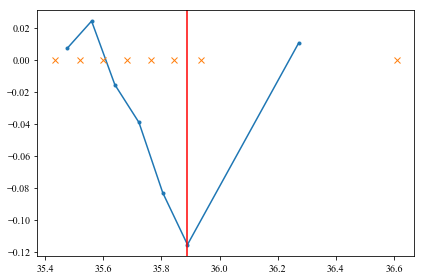

       lat station    T(C)       S  sigma_t             x            dx
0  36.0485      B9  20.158  33.699   23.730      0.000000      0.000000
1  36.1270     B10  18.378  33.229   23.824   8728.801742   8728.801742
2  36.2273     B11  20.988  33.781   23.571  19881.652884  11152.851142
3  36.2977     B12  23.615  33.800   22.848  27709.775720   7828.122836
4  36.3885     B13  23.804  34.181   23.081  37806.275059  10096.499339
5  36.4710     B14  23.171  34.160   23.091  46979.856507   9173.581448
6  36.5502     B15  23.583  34.185   23.148  55786.494698   8806.638190
7  36.6308     B16  22.333  34.107   23.448  64748.805785   8962.311088
1   -0.203923
2    0.234021
3    0.335585
4    0.018719
5   -0.069002
6    0.046783
7   -0.139473
Name: dx, dtype: float64


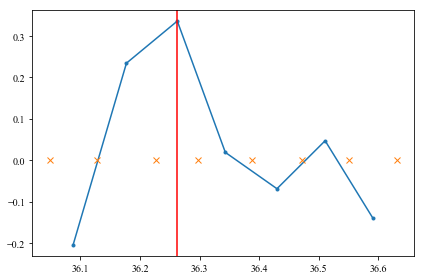

       lat station    T(C)       S  sigma_t             x            dx
8  35.7430     C25  22.196  34.110   23.489     -0.000000   9785.153545
7  35.8310     C24  18.564  33.355   23.875   9785.153545   8973.430580
6  35.9117     C23  18.074  33.224   23.896  18758.584125   9451.568765
5  35.9967     C22  18.109  33.156   23.835  28210.152890   9151.342463
4  36.0790     C21  19.269  33.552   23.848  37361.495353   9029.028044
3  36.1602     C20  20.740  33.842   23.683  46390.523396  18736.345140
2  36.3287     C19  22.332  34.128   23.464  65126.868536   9573.883184
1  36.4148     C18  21.520  34.189   23.741  74700.751720   9473.807750
0  36.5000     C17  20.053  33.748   23.794  84174.559470      0.000000
8   -0.371175
7   -0.054606
6    0.003703
5    0.126757
4    0.162919
3    0.084969
2   -0.084814
1   -0.154848
Name: dx, dtype: float64


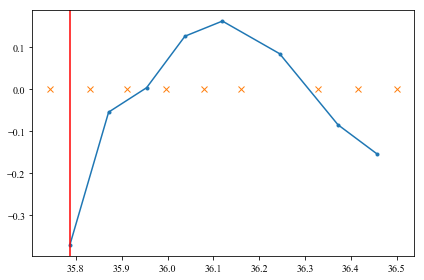

       lat station    T(C)       S    sigma_t             x           dx
0  35.5870     D26  24.511  34.214  22.894576      0.000000     0.000000
1  35.6712     D27  23.804  34.201  23.094281   9362.612823  9362.612823
2  35.7537     D28  22.180  34.099  23.483027  18536.194272  9173.581448
3  35.8347     D29  18.039  33.279  23.944876  27542.983330  9006.789058
4  35.9160     D30  19.512  32.856  23.253229  36583.130866  9040.147536
5  35.9997     D31  18.306  33.342  23.927574  45890.146226  9307.015360
6  36.0818     D32  21.148  33.960  23.662251  55019.249704  9129.103478
7  36.1672     D33  21.322  33.799  23.492435  64515.296439  9496.046735
1   -0.075513
2   -0.177030
3   -0.459764
4    0.162940
5   -0.129580
6    0.311312
7    0.018323
Name: dx, dtype: float64


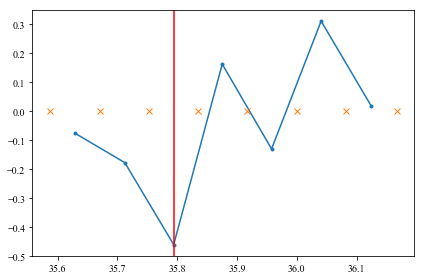

       lat station     T(C)        S    sigma_t             x           dx
7  35.1478     E41      NaN      NaN        NaN     -0.000000  2101.584114
6  35.1667     E40  25.0716  34.2832  22.777894   2101.584114  9262.537389
5  35.2500     E39  24.8162  34.2554  22.834186  11364.121503  9262.537389
4  35.3333     E38  25.0242  33.4304  22.148211  20626.658893  9273.656882
3  35.4167     E37  25.0484  34.2704  22.775268  29900.315775  9262.537389
2  35.5000     E36  24.1426  34.2858  23.058580  39162.853164  9262.537389
1  35.5833     E35  24.1426  34.2500  23.031495  48425.390554  9273.656882
0  35.6667     E34  23.3950  34.1640  23.185655  57699.047436     0.000000
7         NaN
6   -0.027573
5    0.022456
4    0.002610
3   -0.097792
2    0.000000
1   -0.080615
Name: dx, dtype: float64


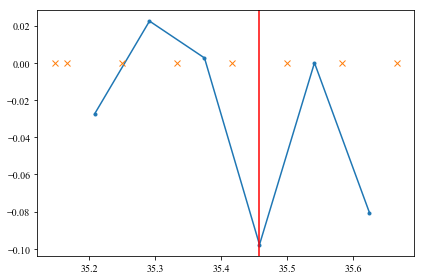

In [4]:
tmp = data[data['depth (m)']==0]
index = range(5)
columns = ['front_lat', 'transect']
front = pd.DataFrame(index=index, columns=columns)

for t in pd.unique(data.transect):
    tt = tmp.loc[tmp['transect']==t,['lat','station','T(C)','S','sigma_t','x','dx']].reset_index(drop=True)
    # make the transects consistently run S-N
    if t=='A' or t=='C' or t=='E':
        tt['x'] = -1*(tt['x']-tt['x'].max())
        tt = tt.sort_values(by='lat', ascending=True)
    print tt              
    
    dt = np.diff(tt['T(C)'])
    dx = tt.loc[tt['dx']>0,'dx']/1000
    dtdx = dt/dx
    adtdx = np.abs(dtdx)
    newx = (tt['x'][0:-1]).values+((tt['dx'][1:]/2).values)
    
    newlat = (tt['lat'][0:-1]).values+(np.diff(tt['lat'])/2)
    print dt/dx
    
    front_lat = newlat[np.where(adtdx == np.max(adtdx))]    
#     front[front['transect']=='t','front_lat'] = newlat[np.where(dtdx == np.max(dtdx))]
    plt.plot(newlat, dtdx,'.-')
    plt.plot(tt['lat'],np.zeros(len(tt)),'x')
    plt.axvline(front_lat,c='r')
    plt.show()
 
                   